# **Modelling**

## **Step1.** Import Data

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [187]:
#flights table
data = pd.read_csv('/Users/Prashanta/Desktop/airplane_data/flights_table(50,000_points).csv',delimiter=';')
data = data.iloc[: , 1:]

#create two samples of 10,000 points each
sample1 = data.sample(n=10000, random_state=0)
sample2 = data.sample(n=10000, random_state=1)

#Adding date time features and state
sample1['month'] = pd.DatetimeIndex(sample1['fl_date']).month
sample2['month'] = pd.DatetimeIndex(sample2['fl_date']).month
sample1['year'] = pd.DatetimeIndex(sample1['fl_date']).year
sample2['year'] = pd.DatetimeIndex(sample2['fl_date']).year
sample1['origin_city_state'] = sample1['origin_city_name'].transform(lambda x: str(x).split(',')[1])
sample2['origin_city_state'] = sample2['origin_city_name'].transform(lambda x: str(x).split(',')[1])
sample1['depart_hour'] = sample1['dep_time'].round(-2)
sample2['depart_hour'] = sample2['dep_time'].round(-2)

In [4]:
display(data.head(3))
display(data.shape)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-30,WN,WN,WN,775,WN,N255WN,775,13495,MSY,...,674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AS,AS,AS,352,AS,N464AS,352,14747,SEA,...,672.0,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-11-21,DL,DL,DL,1312,DL,N912DL,1312,10994,CHS,...,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(50000, 42)

## **Step2.** Create BaseModel using Linear Regression

In [135]:
#create test model df
test_model_1 = sample1[['month','origin_city_state','depart_hour','arr_delay']]

# Droping nan value rows
test_model_1.dropna(inplace=True)

# Encode Cateogircal Values 
# Change dtype of variable to category then encode using cat.codes
test_model_1['origin_city_state'] = test_model_1['origin_city_state'].astype('category')
test_model_1['origin_city_state'] = test_model_1['origin_city_state'].cat.codes

#Assign train and target variables
X = test_model_1[['month','origin_city_state','depart_hour']]
y = test_model_1['arr_delay']

<ipython-input-135-ac5d82c39b9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_model_1.dropna(inplace=True)
<ipython-input-135-ac5d82c39b9a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_model_1['origin_city_state'] = test_model_1['origin_city_state'].astype('category')
<ipython-input-135-ac5d82c39b9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [136]:
# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#initialize and fit training dataset
Linear_Regressor = LinearRegression()
Linear_Regressor.fit(X_train, y_train)

#make prediction 
y_pred = Linear_Regressor.predict(X_test)

#prints the coefficients used for each attribute
print('variables', list(X.columns))
print('coefficients:', Linear_Regressor.coef_)
print()

#prints the R2 score for your test dataset
print('R2 Score for train data:', round(Linear_Regressor.score(X_train,y_train),3))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),3))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))

variables ['month', 'origin_city_state', 'depart_hour']
coefficients: [-0.07959701  0.04777177  0.01045926]

R2 Score for train data: 0.012
R2 Score2 for test data: 0.015
MAE Score for test data:  23.62


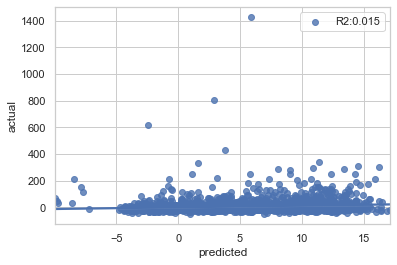

In [137]:
df = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)

## **Step3.** Add key features to basemodel and run Linear Reg again

## **Step4.** Remove outlier data from Key Features

## **Step5.** Optimize model with better features and cleaner dataset

In [442]:
# load dataset (50,000 datapoints)
data = pd.read_csv('/Users/Prashanta/Desktop/airplane_data/flights_table(50,000_points).csv',delimiter=';')
data = data.iloc[: , 1:]

# drop all cancelled and diverted flights
filter1 = (data['cancelled']!=1) & (data['diverted']!=1)
data = data[filter1]

# drop outlier
data = data[(data['arr_delay']<50) & (data['arr_delay']>-50)]
data = data[(data['dep_delay']<50) & (data['dep_delay']>-50)]

#Adding date time features and state
data['month'] = pd.DatetimeIndex(data['fl_date']).month
data['year'] = pd.DatetimeIndex(data['fl_date']).year
data['day'] = pd.DatetimeIndex(data['fl_date']).day
data['origin_city_state'] = data['origin_city_name'].transform(lambda x: str(x).split(',')[1])
data['origin_city'] = data['origin_city_name'].transform(lambda x: str(x).split(',')[0])
data['depart_hour'] = data['dep_time'].round(-2)

# Add key features
data['dep_delay_city'] = data[['dep_delay','origin_city']].groupby(by='origin_city').transform(lambda x: x.mean())
data['arr_delay_city'] = data[['arr_delay','origin_city']].groupby(by='origin_city').transform(lambda x: x.mean())

#drop columns
data = data[['month','day','year','origin_city','origin_city_state','distance','air_time','depart_hour','dep_delay_city','arr_delay_city','arr_delay']]

In [444]:
#drop null values
data = data.dropna()

data.shape

In [350]:
#data.hist(figsize=(15,15))

In [446]:
data

,month,day,year,origin_city,origin_city_state,distance,air_time,depart_hour,dep_delay_city,arr_delay_city,arr_delay
0,12,30,2019,New Orleans,LA,674.0,84.0,600.0,1.710611,-4.176849,-3.0
1,4,8,2018,Seattle,WA,672.0,98.0,600.0,1.014692,-4.634527,25.0
2,11,21,2018,Charleston,SC,259.0,46.0,800.0,-1.163522,-7.421384,-13.0
3,12,19,2019,Fort Lauderdale,FL,994.0,128.0,2200.0,1.163701,-4.740214,-16.0
4,9,21,2019,Roanoke,VA,530.0,82.0,1100.0,1.934783,-4.913043,-36.0
...,...,...,...,...,...,...,...,...,...,...,...
49994,2,3,2018,San Diego,CA,446.0,65.0,900.0,0.372477,-5.754128,-15.0
49995,6,28,2019,Rochester,NY,257.0,52.0,1000.0,-3.457364,-8.736434,-18.0
49997,3,3,2018,Chicago,IL,258.0,45.0,1000.0,1.995374,-3.535852,-24.0
49998,9,5,2018,Atlanta,GA,533.0,74.0,2100.0,2.164212,-4.487729,-12.0


/Users/Prashanta/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dep_delay', ylabel='Density'>

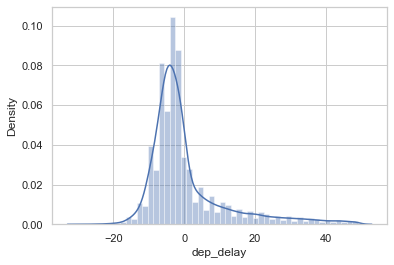

In [441]:
sns.distplot(data['dep_delay'])

In [440]:
data

,month,day,year,origin_city,origin_city_state,distance,air_time,depart_hour,dep_delay,arr_delay,dep_delay_city,arr_delay_city
0,12,30,2019,New Orleans,LA,674.0,84.0,600.0,12.0,-3.0,1.710611,-4.176849
1,4,8,2018,Seattle,WA,672.0,98.0,600.0,0.0,25.0,1.014692,-4.634527
2,11,21,2018,Charleston,SC,259.0,46.0,800.0,-8.0,-13.0,-1.163522,-7.421384
3,12,19,2019,Fort Lauderdale,FL,994.0,128.0,2200.0,-10.0,-16.0,1.163701,-4.740214
4,9,21,2019,Roanoke,VA,530.0,82.0,1100.0,-13.0,-36.0,1.934783,-4.913043
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2,3,2018,San Diego,CA,446.0,65.0,900.0,-2.0,-15.0,0.372477,-5.754128
49995,6,28,2019,Rochester,NY,257.0,52.0,1000.0,-10.0,-18.0,-3.457364,-8.736434
49997,3,3,2018,Chicago,IL,258.0,45.0,1000.0,-4.0,-24.0,1.995374,-3.535852
49998,9,5,2018,Atlanta,GA,533.0,74.0,2100.0,-6.0,-12.0,2.164212,-4.487729


In [439]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data)
display(data.shape)

,Total,Percent
arr_delay_city,0,0.0
dep_delay_city,0,0.0
arr_delay,0,0.0
dep_delay,0,0.0
depart_hour,0,0.0
air_time,0,0.0
distance,0,0.0
origin_city_state,0,0.0
origin_city,0,0.0
year,0,0.0


(44551, 12)